# AP 104 Final Project
### Given the image of the object/marker, submit the code that performs the following tasks:
- Segment the marker using color thresholding. Display the segmented image.
- Identify the 6 corner points.
- Uniquely ID the points clockwise/counter-clockwise with the inner corner as the starting point. Plot these points on the image.
- With the inner corner as one point, identify the lines that originate from this point. 
- Calculate the angle these lines make with respect to the x-axis

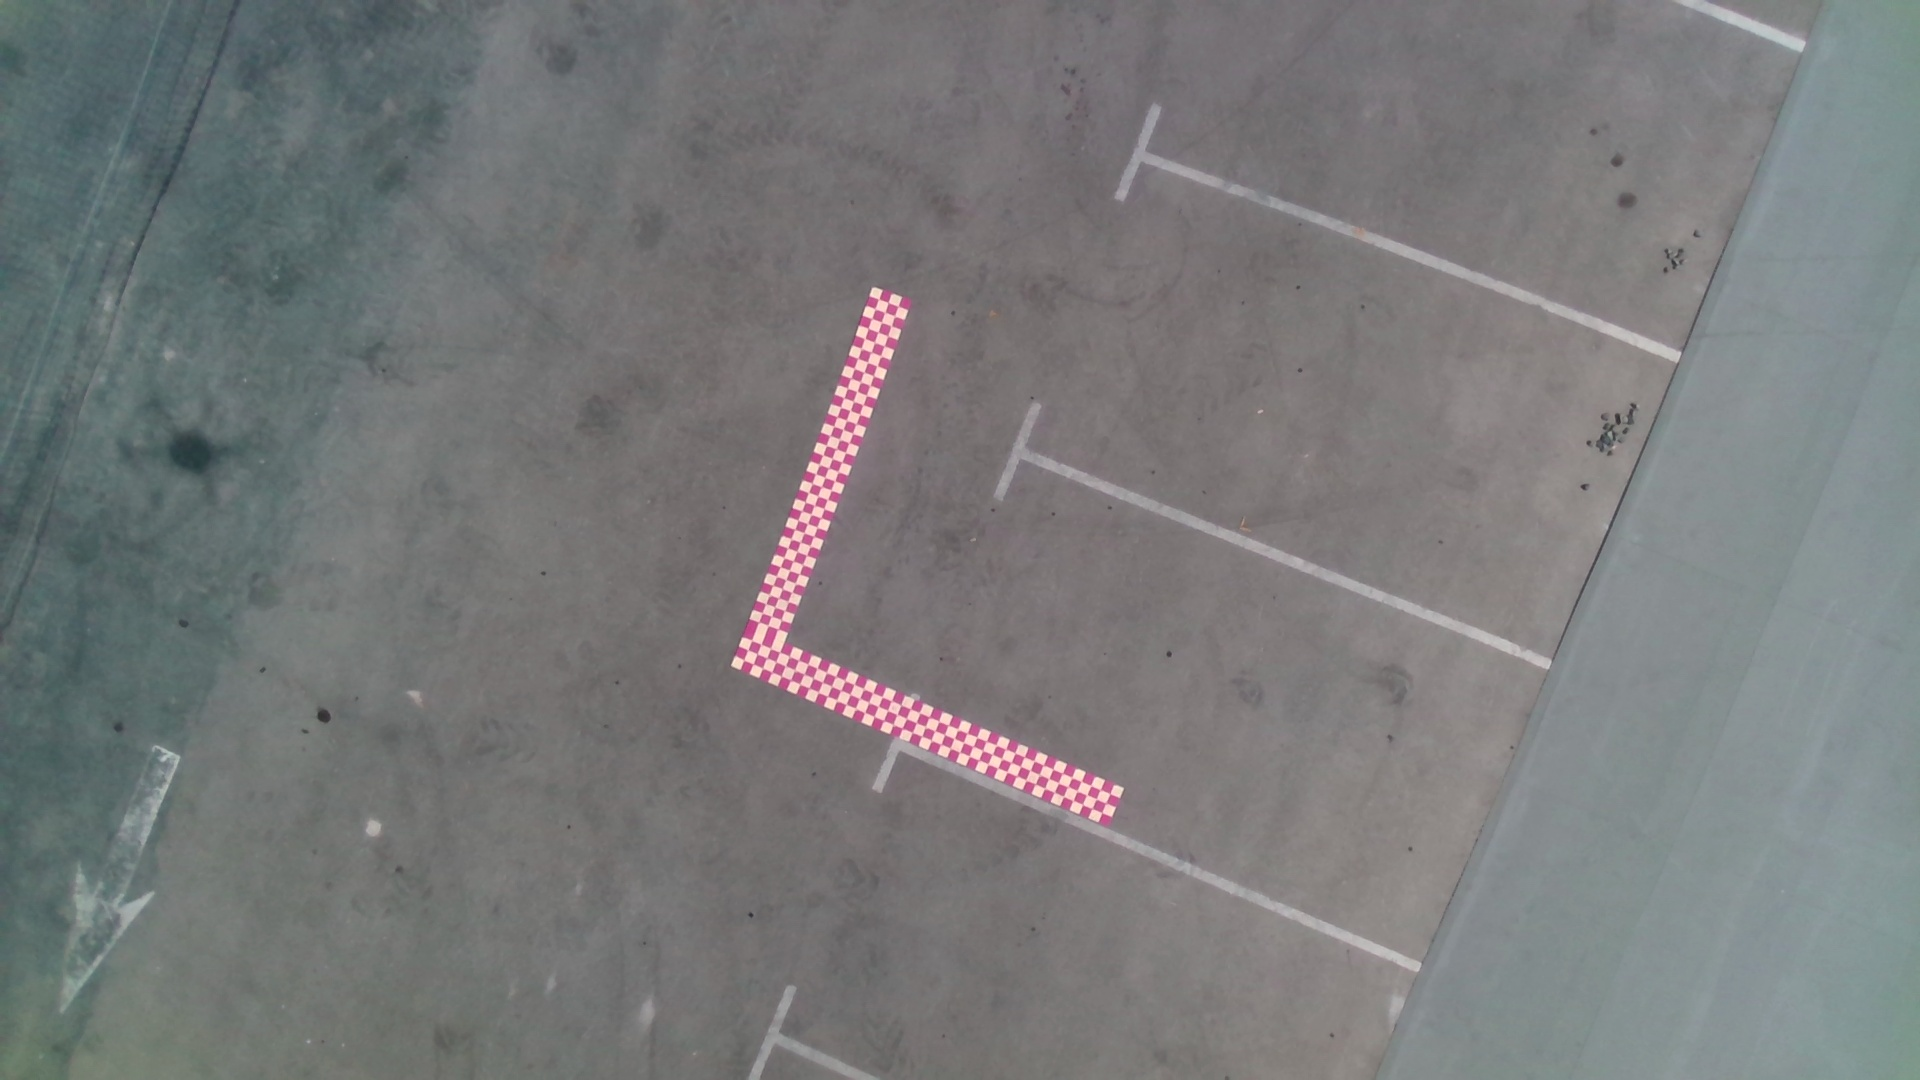

In [1]:
# Import all neccessary libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib notebook

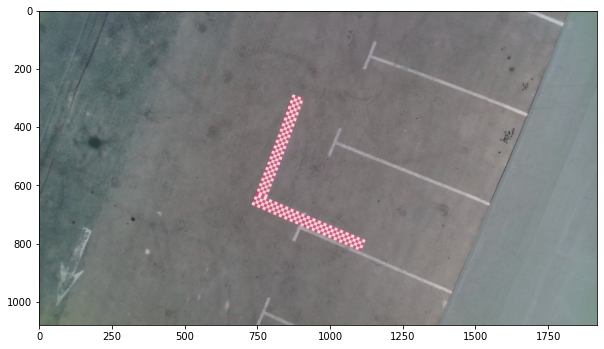

In [2]:
# Read the image
plt.figure(figsize=(10,10))
img = cv2.imread("Image.jpg")
plt.imshow(img[:,:,::-1])
plt.show()

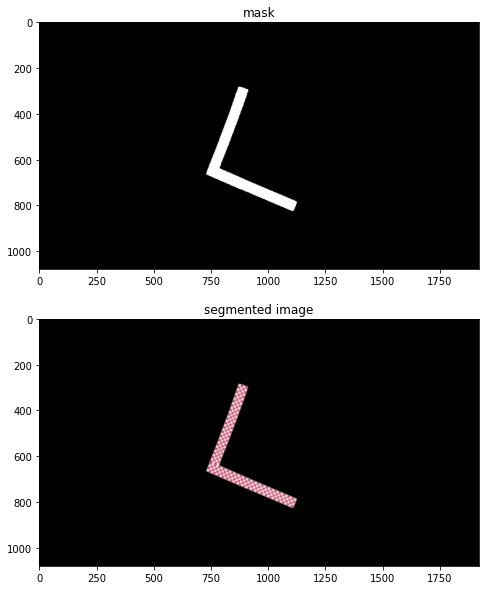

In [3]:
# Segment the 'L' marker using color segmentation 
# Plot the segmented image
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = 255 - cv2.inRange(img_hsv, (0,0,0), (179,88,183))
mask = cv2.erode(mask, kernel=np.ones((5,5)), iterations=1)
mask = cv2.dilate(mask, kernel=np.ones((5,5)), iterations=2)
mask[:,1200:] = 0


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(mask, cmap="gray")
plt.title('mask')
img_segmented = img.copy()
img_segmented = cv2.bitwise_and(img_segmented,img_segmented, mask=mask)
plt.subplot(2,1,2)
plt.imshow(img_segmented[:,:,::-1])
plt.title("segmented image")
plt.show()

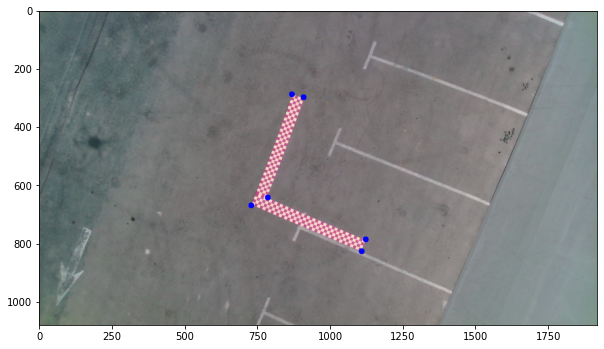

In [4]:
# Identify the corner points
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = max(contours, key=cv2.contourArea)
corners = cv2.approxPolyDP(contours, 10, True)
img_corners = img.copy()
for idx, point in enumerate(corners):
    point = point[0]
    cv2.circle(img_corners, (point[0], point[1]), 10, (255,0,0), cv2.FILLED)

plt.figure(figsize=(10,10))
plt.imshow(img_corners[:,:,::-1])
plt.show()

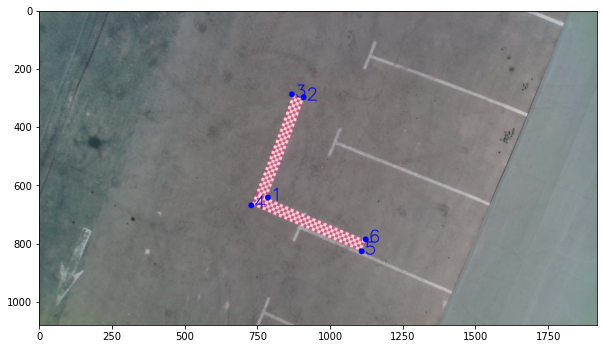

In [5]:
# ID the points keeping the inner corner as the starting point

# Find index of the innter corner
inner_idx = 0
n = len(corners)
for idx, point in enumerate(corners):
    point = point[0]
    point_before = corners[idx-1][0]
    point_after = corners[(idx+1) % n][0]
    
    A = point_after - point
    B = point_before - point
    
    # Filpping y axis to align with cartesian coordinates
    A[1] = -A[1]
    B[1] = -B[1]
    
    angle_between_lines = np.arctan2(*(A[::-1])) - np.arctan2(*(B[::-1]))
    
    if angle_between_lines < 0:
        angle_between_lines += 2*np.pi
    if angle_between_lines < np.pi:
        inner_idx = idx
        break

img_corners = img.copy()
for idx, point in enumerate(corners):
    point = point[0]
    cv2.circle(img_corners, (point[0], point[1]), 10, (255,0,0), cv2.FILLED)
    cv2.putText(img_corners, str((idx-inner_idx)%n+1), (point[0]+10, point[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img_corners[:,:,::-1])
plt.show()

In [6]:
# Identify the lines the originate from this point and compute the angle it makes with the x-axis
# L1 = Line from pt 1 and pt 2 (Calculated corner ids are in anti-clockwise direction)
# L2 = Line from pt 1 and pt 6
# Angle between L1 and x-axis
# Angle between L2 and x-axis
pt = corners[inner_idx][0] # Center point
pt1 = corners[(inner_idx+1)%n][0] - pt
pt2 = corners[inner_idx-1][0] - pt

angle_1 = np.arctan2(-pt1[1], pt1[0])
angle_2 = np.arctan2(-pt2[1], pt2[0])

print(f"Angle L1 makes with x-axis = {np.rad2deg(angle_1)}")
print(f"Angle L2 makes with x-axis = {np.rad2deg(angle_2)}")

Angle L1 makes with x-axis = 70.37774386134916
Angle L2 makes with x-axis = -23.137004246238227
